# Healthcare Lab (Ensembles Classification Task)

**Learning Objectives:**
  * Define and fit classification models using Decision Trees
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


# Context of the Analysis

### Objective - We want to train a ML based classifier able to identify patients at risk of experiencing life threatening events.
#### The classifier relies on patients' medical history.


## 1. Library Import

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## 2. Data loading and DataFrame creation

In [ ]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [ ]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [ ]:
HealthCareDataSet.describe()

,Id,ClaimItem,StartDate,EndDate,RevenueCode,BirthDate,TotalExpenses
count,52563.000000,52563.000000,52563,52563,52563.000000,52563,52563.000000
mean,685655.197953,12.023990,2020-06-21 00:12:27.902516992,2020-06-24 21:03:58.958963200,386.321995,1948-05-11 14:05:37.378003712,2735.230373
min,634363.000000,1.000000,2020-01-01 00:00:00,2020-01-01 00:00:00,24.000000,1921-01-18 00:00:00,0.000000
25%,658574.500000,5.000000,2020-03-09 00:00:00,2020-03-13 00:00:00,301.000000,1939-11-10 00:00:00,194.642000
50%,684404.000000,10.000000,2020-06-22 00:00:00,2020-06-26 00:00:00,307.000000,1947-05-12 00:00:00,675.262000
75%,712375.500000,16.000000,2020-09-25 00:00:00,2020-09-29 00:00:00,450.000000,1953-12-02 00:00:00,2309.265000
max,741736.000000,127.000000,2020-12-31 00:00:00,2020-12-31 00:00:00,942.000000,1999-08-09 00:00:00,504533.400000
std,30913.839360,10.747558,NaN,NaN,158.551733,NaN,8292.178928


In [ ]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

In [ ]:
HealthCareDataSet['AgeAtMedicalEvent']=(HealthCareDataSet['StartDate']-HealthCareDataSet['BirthDate'])

In [ ]:
HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

,AgeAtMedicalEvent
0,52.657084
1,52.657084
2,52.657084
3,52.657084
4,52.657084
...,...
52558,80.637919
52559,70.258727
52560,70.258727
52561,70.258727


In [ ]:
HealthCareDataSet['AgeAtMedicalEvent']=HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

In [ ]:
## We need to compute the duration of each Medical Treatment
HealthCareDataSet['MedicalTreatmentDuration']=(HealthCareDataSet['EndDate']-HealthCareDataSet['StartDate']).dt.days

In [ ]:
# prompt: extract characters up to the first dot in principaldiagnosis

# Assuming 'HealthCareDataSet' is your DataFrame
HealthCareDataSet['PrincipalDiagnosis_MainCode'] = HealthCareDataSet['PrincipalDiagnosis'].str.split('.').str[0]

In [ ]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,PrincipalDiagnosis_MainCode
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148,52.657084,0,R10
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073,52.657084,0,R10
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900,52.657084,0,R10


In [ ]:
# prompt: find ICD10 medical codes for life threatening conditions

# Assuming 'HealthCareDataSet' is your DataFrame containing the medical data.

# Create a list of ICD-10 codes associated with life-threatening conditions.
# This is a simplified example, and a more comprehensive list might be needed.
life_threatening_icd10_codes = [
    "I21",  # Acute myocardial infarction
    "I46",
    "I20",  # Angina pectoris
    "I60",
    "I50",
    "A40",  # Sepsis
    "A41",  # Sepsis
    "J96",
    "J80",
    "J95",
    "J44",
    "I61",
    "N17",
    "N18"
]




In [ ]:
HealthCareDataSet['LifeThreateningEvent']=0
HealthCareDataSet.loc[HealthCareDataSet["PrincipalDiagnosis_MainCode"].isin(life_threatening_icd10_codes),'LifeThreateningEvent']=1

In [ ]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,...,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,PrincipalDiagnosis_MainCode,LifeThreateningEvent
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148,52.657084,0,R10,0
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073,52.657084,0,R10,0
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900,52.657084,0,R10,0


In [ ]:
HealthCareDataSet.groupby('LifeThreateningEvent').count().sort_values(by='Id')

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,PrincipalDiagnosis_MainCode
LifeThreateningEvent,,,,,,,,,,,,,,,,,,,,
1,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539
0,45024,45024,45024,45024,45024,45024,45024,45024,45024,45024,45024,45024,45022,45024,45024,45024,45024,45024,45024,45024


In [ ]:
## We create a new column containing the series of medical events


HealthCareDataSet['PrincipalDiagnosis_MainCode_Series'] =HealthCareDataSet['PrincipalDiagnosis_MainCode'].str[0]


In [ ]:
HealthCareDataSet[['PrincipalDiagnosis_MainCode','PrincipalDiagnosis_MainCode_Series']]

,PrincipalDiagnosis_MainCode,PrincipalDiagnosis_MainCode_Series
0,R10,R
1,R10,R
2,R10,R
3,R10,R
4,R10,R
...,...,...
52558,S06,S
52559,D50,D
52560,D50,D
52561,D50,D


## 3. Feature compilation

In [ ]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,...,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,PrincipalDiagnosis_MainCode,LifeThreateningEvent,PrincipalDiagnosis_MainCode_Series
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148,52.657084,0,R10,0,R
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073,52.657084,0,R10,0,R
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900,52.657084,0,R10,0,R


In [ ]:
HealthCareDataSet.sort_values(by='MedicalClaim').head(20)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,...,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,PrincipalDiagnosis_MainCode,LifeThreateningEvent,PrincipalDiagnosis_MainCode_Series
45226,724878,f62af3d0,2c403f93,fd218584,0012a8eb3c2be5f5,4,ae2f2d9e,HOSPITAL,2020-11-18,2020-11-18,...,EKG/ECG,730.0,ER,1956-08-25,678.027,64.232717,0,S86,0,S
45227,724879,f62af3d0,2c403f93,fd218584,0012a8eb3c2be5f5,3,ae2f2d9e,HOSPITAL,2020-11-18,2020-11-18,...,EMERGENCY ROOM,450.0,ER,1956-08-25,2926.000,64.232717,0,S86,0,S
45228,724880,f62af3d0,2c403f93,fd218584,0012a8eb3c2be5f5,1,ae2f2d9e,HOSPITAL,2020-11-18,2020-11-18,...,PHARMACY,250.0,ER,1956-08-25,4.998,64.232717,0,S86,0,S
45229,724881,f62af3d0,2c403f93,fd218584,0012a8eb3c2be5f5,2,ae2f2d9e,HOSPITAL,2020-11-18,2020-11-18,...,RADIOLOGY - DIAGNOSTIC,320.0,ER,1956-08-25,1059.667,64.232717,0,S86,0,S
28543,689528,5f1ddbe8,3eae7881,b021dd12,002fd7d73d8060f1,15,cf2a3695,HOSPITAL,2020-07-17,2020-07-23,...,OCCUPATIONAL THERAPY,430.0,INP,1945-09-05,225.960,74.863792,6,G50,0,G
28542,689527,5f1ddbe8,3eae7881,b021dd12,002fd7d73d8060f1,3,cf2a3695,HOSPITAL,2020-07-17,2020-07-23,...,PHARMACY,250.0,INP,1945-09-05,3229.632,74.863792,6,G50,0,G
28541,689526,5f1ddbe8,3eae7881,b021dd12,002fd7d73d8060f1,24,cf2a3695,HOSPITAL,2020-07-17,2020-07-23,...,EKG/ECG,730.0,INP,1945-09-05,271.978,74.863792,6,G50,0,G
28540,689525,5f1ddbe8,3eae7881,b021dd12,002fd7d73d8060f1,22,cf2a3695,HOSPITAL,2020-07-17,2020-07-23,...,MAGNETIC RESONANCE TECH. (MRT): BRAIN (INCL. B...,611.0,INP,1945-09-05,6529.684,74.863792,6,G50,0,G
28539,689524,5f1ddbe8,3eae7881,b021dd12,002fd7d73d8060f1,21,cf2a3695,HOSPITAL,2020-07-17,2020-07-23,...,CARDIOLOGY: ECHOCARDIOLOGY,483.0,INP,1945-09-05,2310.560,74.863792,6,G50,0,G
28530,689512,5f1ddbe8,3eae7881,b021dd12,002fd7d73d8060f1,16,cf2a3695,HOSPITAL,2020-07-17,2020-07-23,...,OCCUPATIONAL THERAPY: EVALUATION/RE-EVALUATION,434.0,INP,1945-09-05,459.340,74.863792,6,G50,0,G


In [ ]:
MedicalClaimsGrouped=HealthCareDataSet.groupby('MedicalClaim').agg({'LifeThreateningEvent':'sum','TotalExpenses':'sum','MedicalTreatmentDuration':'first','PrincipalDiagnosis_MainCode_Series': 'first','MemberID':'first','TypeFlag':'first','AgeAtMedicalEvent':'first'}).reset_index()
MedicalClaimsGrouped

,MedicalClaim,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,PrincipalDiagnosis_MainCode_Series,MemberID,TypeFlag,AgeAtMedicalEvent
0,0012a8eb3c2be5f5,0,4668.692,0,S,2c403f93,ER,64.232717
1,002fd7d73d8060f1,0,53501.259,6,G,3eae7881,INP,74.863792
2,003886fc8ec986d4,0,17115.714,0,J,7910c083,ER,64.380561
3,004fa1cd47f65193,0,3672.361,0,B,9b794cb5,ER,68.944559
4,005edafb00d0f6eb,0,2548.700,0,M,f48d86f4,ER,73.338809
...,...,...,...,...,...,...,...,...
3356,ffbb520f6fd3b2c9,0,16743.412,0,R,c37ae8c9,ER,73.691992
3357,ffbd17c54f798c21,0,137173.701,9,S,e9996803,INP,83.219713
3358,ffe2c14dfe865b6d,0,82255.586,4,D,21610716,INP,82.663929
3359,ffe9f5181940e236,0,32393.578,2,R,4b81e6f7,INP,84.569473


In [ ]:
MedicalClaimsGroupedDummies=pd.get_dummies(MedicalClaimsGrouped.sort_values(by='MemberID'), columns=['PrincipalDiagnosis_MainCode_Series','TypeFlag'],dtype='int')
MedicalClaimsGroupedDummies

,MedicalClaim,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,MemberID,AgeAtMedicalEvent,PrincipalDiagnosis_MainCode_Series_A,PrincipalDiagnosis_MainCode_Series_B,PrincipalDiagnosis_MainCode_Series_C,PrincipalDiagnosis_MainCode_Series_D,...,PrincipalDiagnosis_MainCode_Series_N,PrincipalDiagnosis_MainCode_Series_O,PrincipalDiagnosis_MainCode_Series_Q,PrincipalDiagnosis_MainCode_Series_R,PrincipalDiagnosis_MainCode_Series_S,PrincipalDiagnosis_MainCode_Series_T,PrincipalDiagnosis_MainCode_Series_U,PrincipalDiagnosis_MainCode_Series_Z,TypeFlag_ER,TypeFlag_INP
443,24a081d0f754e53e,0,158558.610,7,00024834,88.158795,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
969,4b5a15fb93cd31ba,0,109266.528,7,00024834,88.216290,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
857,42efad506c7fa1a2,0,5725.587,0,00198770,62.770705,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2569,c3c31f9339fef298,0,172035.920,7,004980c9,72.780287,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3024,e64af0c1c6887443,0,1821.890,0,004d7fd0,88.936345,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,bee070b6550ba6b3,0,35701.561,1,fee15f24,79.682409,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1630,7bb641881f53aca0,0,91724.941,1,ff3c17df,81.946612,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
135,0ae12c3b63e8c251,0,5034.834,0,ff64d58b,69.081451,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1669,7f1919675967fceb,0,10374.301,0,ff64d58b,69.081451,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
MedicalClaimsGroupedDummiesConsolidated=MedicalClaimsGroupedDummies.groupby('MemberID').agg(lambda x: x.max() if x.name is 'AgeAtMedicalEvent' else x.sum()).sort_values(by='TotalExpenses')


In [ ]:
MedicalClaimsGroupedDummiesConsolidated.drop('MedicalClaim',inplace=True,axis=1)
MedicalClaimsGroupedDummiesConsolidated

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,PrincipalDiagnosis_MainCode_Series_A,PrincipalDiagnosis_MainCode_Series_B,PrincipalDiagnosis_MainCode_Series_C,PrincipalDiagnosis_MainCode_Series_D,PrincipalDiagnosis_MainCode_Series_E,PrincipalDiagnosis_MainCode_Series_F,...,PrincipalDiagnosis_MainCode_Series_N,PrincipalDiagnosis_MainCode_Series_O,PrincipalDiagnosis_MainCode_Series_Q,PrincipalDiagnosis_MainCode_Series_R,PrincipalDiagnosis_MainCode_Series_S,PrincipalDiagnosis_MainCode_Series_T,PrincipalDiagnosis_MainCode_Series_U,PrincipalDiagnosis_MainCode_Series_Z,TypeFlag_ER,TypeFlag_INP
MemberID,,,,,,,,,,,,,,,,,,,,,
2f83e2ef,0,280.700,0,71.619439,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
26438e33,0,388.185,0,75.077344,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
cd725d86,0,433.300,0,70.603696,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
c45c8ba3,0,492.100,0,66.193018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9e636133,0,550.200,0,74.217659,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54dabc09,25,1026046.063,72,80.851472,2,0,0,0,1,0,...,0,0,0,0,0,0,1,0,2,4
e8b6b438,64,1033237.527,59,73.002053,0,0,0,0,4,0,...,3,0,0,4,0,0,1,0,6,13
c1fb6713,67,1107621.039,80,68.462697,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


MedicalClaimsGroupedDummiesConsolidated.sort_values(by='LifeThreateningEvent',ascending=False).head(10)

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,PrincipalDiagnosis_MainCode_Series_A,PrincipalDiagnosis_MainCode_Series_B,PrincipalDiagnosis_MainCode_Series_C,PrincipalDiagnosis_MainCode_Series_D,PrincipalDiagnosis_MainCode_Series_E,PrincipalDiagnosis_MainCode_Series_F,PrincipalDiagnosis_MainCode_Series_G,PrincipalDiagnosis_MainCode_Series_H,PrincipalDiagnosis_MainCode_Series_I,PrincipalDiagnosis_MainCode_Series_J,PrincipalDiagnosis_MainCode_Series_K,PrincipalDiagnosis_MainCode_Series_L,PrincipalDiagnosis_MainCode_Series_M,PrincipalDiagnosis_MainCode_Series_N,PrincipalDiagnosis_MainCode_Series_O,PrincipalDiagnosis_MainCode_Series_Q,PrincipalDiagnosis_MainCode_Series_R,PrincipalDiagnosis_MainCode_Series_S,PrincipalDiagnosis_MainCode_Series_T,PrincipalDiagnosis_MainCode_Series_U,PrincipalDiagnosis_MainCode_Series_Z,TypeFlag_ER,TypeFlag_INP
MemberID,,,,,,,,,,,,,,,,,,,,,,,,,,,
2043affa,209,185973.620,8,71.808350,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,9,1
c3dc84ff,160,645076.740,26,40.481862,1,0,0,0,7,0,1,0,6,5,0,0,0,1,0,0,1,0,0,0,0,6,16
c1a327ff,97,716056.215,108,70.636550,2,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,5
2f0a9cd3,96,191925.979,22,61.886379,0,0,0,0,0,0,0,0,3,2,0,1,0,0,0,0,0,0,0,0,0,2,4
d57eed43,94,632625.000,63,71.255305,0,0,0,0,1,0,0,0,1,5,0,0,0,0,0,0,2,1,0,1,0,2,9
b69f8250,93,386950.186,26,72.325804,0,0,0,0,1,1,0,3,3,9,0,0,1,0,0,0,3,0,0,0,0,12,9
d89b622f,91,461086.808,48,75.646817,0,0,0,0,0,0,0,0,6,1,0,0,0,2,0,0,3,0,0,0,0,3,9
6300cdae,90,2075233.916,185,65.160849,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,1,0,0,0,0,2,5
c1fb6713,67,1107621.039,80,68.462697,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,4


## 4. Exploratory Data Analysis
### Our objective is the training of a Ml-based system to predict patients' odds of being at risk of experiencing life threatening events

In [ ]:
corr=MedicalClaimsGroupedDummiesConsolidated.corr()
corr

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,PrincipalDiagnosis_MainCode_Series_A,PrincipalDiagnosis_MainCode_Series_B,PrincipalDiagnosis_MainCode_Series_C,PrincipalDiagnosis_MainCode_Series_D,PrincipalDiagnosis_MainCode_Series_E,PrincipalDiagnosis_MainCode_Series_F,PrincipalDiagnosis_MainCode_Series_G,PrincipalDiagnosis_MainCode_Series_H,PrincipalDiagnosis_MainCode_Series_I,PrincipalDiagnosis_MainCode_Series_J,PrincipalDiagnosis_MainCode_Series_K,PrincipalDiagnosis_MainCode_Series_L,PrincipalDiagnosis_MainCode_Series_M,PrincipalDiagnosis_MainCode_Series_N,PrincipalDiagnosis_MainCode_Series_O,PrincipalDiagnosis_MainCode_Series_Q,PrincipalDiagnosis_MainCode_Series_R,PrincipalDiagnosis_MainCode_Series_S,PrincipalDiagnosis_MainCode_Series_T,PrincipalDiagnosis_MainCode_Series_U,PrincipalDiagnosis_MainCode_Series_Z,TypeFlag_ER,TypeFlag_INP
LifeThreateningEvent,1.000000,0.450432,0.465970,-0.000139,0.479395,-0.031058,-0.010677,-0.018642,0.214304,-0.009905,0.009649,0.021705,0.288019,0.550686,0.014419,0.016556,-0.045490,0.208672,-0.008100,-0.011458,0.087047,-0.063800,0.014482,0.024199,0.008421,0.133224,0.528193
TotalExpenses,0.450432,1.000000,0.885184,0.045630,0.255905,-0.034983,0.086315,0.115340,0.234922,0.016528,0.079336,0.010795,0.409193,0.204816,0.164969,0.068807,0.044677,0.142236,-0.011614,-0.009298,0.121506,0.045255,0.150765,0.075265,0.092918,0.088725,0.703965
MedicalTreatmentDuration,0.465970,0.885184,1.000000,0.058760,0.271549,-0.025516,0.074806,0.124180,0.211775,0.028769,0.060056,0.000172,0.363463,0.210901,0.138458,0.078689,0.004274,0.169937,-0.004871,-0.001692,0.082833,0.019665,0.165957,0.123986,0.110523,0.043700,0.691762
AgeAtMedicalEvent,-0.000139,0.045630,0.058760,1.000000,0.019087,-0.040351,0.028880,0.062080,-0.041735,-0.089412,-0.092652,-0.082710,0.067968,-0.085023,-0.065496,-0.082544,-0.043620,0.016049,-0.102410,-0.004855,-0.084115,0.016529,-0.030092,0.053114,-0.050806,-0.172902,0.051995
PrincipalDiagnosis_MainCode_Series_A,0.479395,0.255905,0.271549,0.019087,1.000000,-0.029911,0.014509,-0.018615,0.071257,-0.019615,-0.023010,-0.018355,-0.013892,0.012630,0.012625,-0.002660,-0.053433,0.030763,-0.006262,-0.008859,0.004584,-0.070543,0.029016,0.007928,-0.004437,-0.040452,0.266974
PrincipalDiagnosis_MainCode_Series_B,-0.031058,-0.034983,-0.025516,-0.040351,-0.029911,1.000000,-0.015484,-0.018121,-0.008523,0.005656,0.092774,0.004782,-0.031708,-0.030697,-0.004890,0.009240,-0.026385,-0.019635,-0.002720,-0.003848,-0.025816,-0.045775,-0.009032,-0.018801,-0.017110,0.039485,-0.029638
PrincipalDiagnosis_MainCode_Series_C,-0.010677,0.086315,0.074806,0.028880,0.014509,-0.015484,1.000000,0.000224,-0.003894,-0.020739,0.000574,0.015723,-0.022863,-0.016918,-0.016386,-0.013646,-0.034680,-0.018165,-0.003242,-0.004586,-0.036577,-0.057133,-0.015863,-0.003061,0.001616,-0.033287,0.063598
PrincipalDiagnosis_MainCode_Series_D,-0.018642,0.115340,0.124180,0.062080,-0.018615,-0.018121,0.000224,1.000000,0.030053,-0.006480,-0.006209,-0.022266,0.009044,0.005504,0.028255,0.005316,-0.028408,-0.017416,-0.003794,-0.005367,-0.029360,-0.023496,0.000638,0.027248,-0.003589,-0.027575,0.145304
PrincipalDiagnosis_MainCode_Series_E,0.214304,0.234922,0.211775,-0.041735,0.071257,-0.008523,-0.003894,0.030053,1.000000,0.033191,0.076467,0.013424,0.110660,0.123562,0.098990,0.127870,0.021844,0.082769,-0.004499,-0.006364,0.119018,-0.012358,0.016508,0.022122,0.042331,0.206966,0.383193
PrincipalDiagnosis_MainCode_Series_F,-0.009905,0.016528,0.028769,-0.089412,-0.019615,0.005656,-0.020739,-0.006480,0.033191,1.000000,0.014649,0.106105,0.038271,0.017681,0.001015,-0.008566,0.002280,-0.026013,0.121864,-0.005154,0.055399,-0.001540,0.027577,-0.025181,0.030913,0.173538,0.034571


<Axes: >

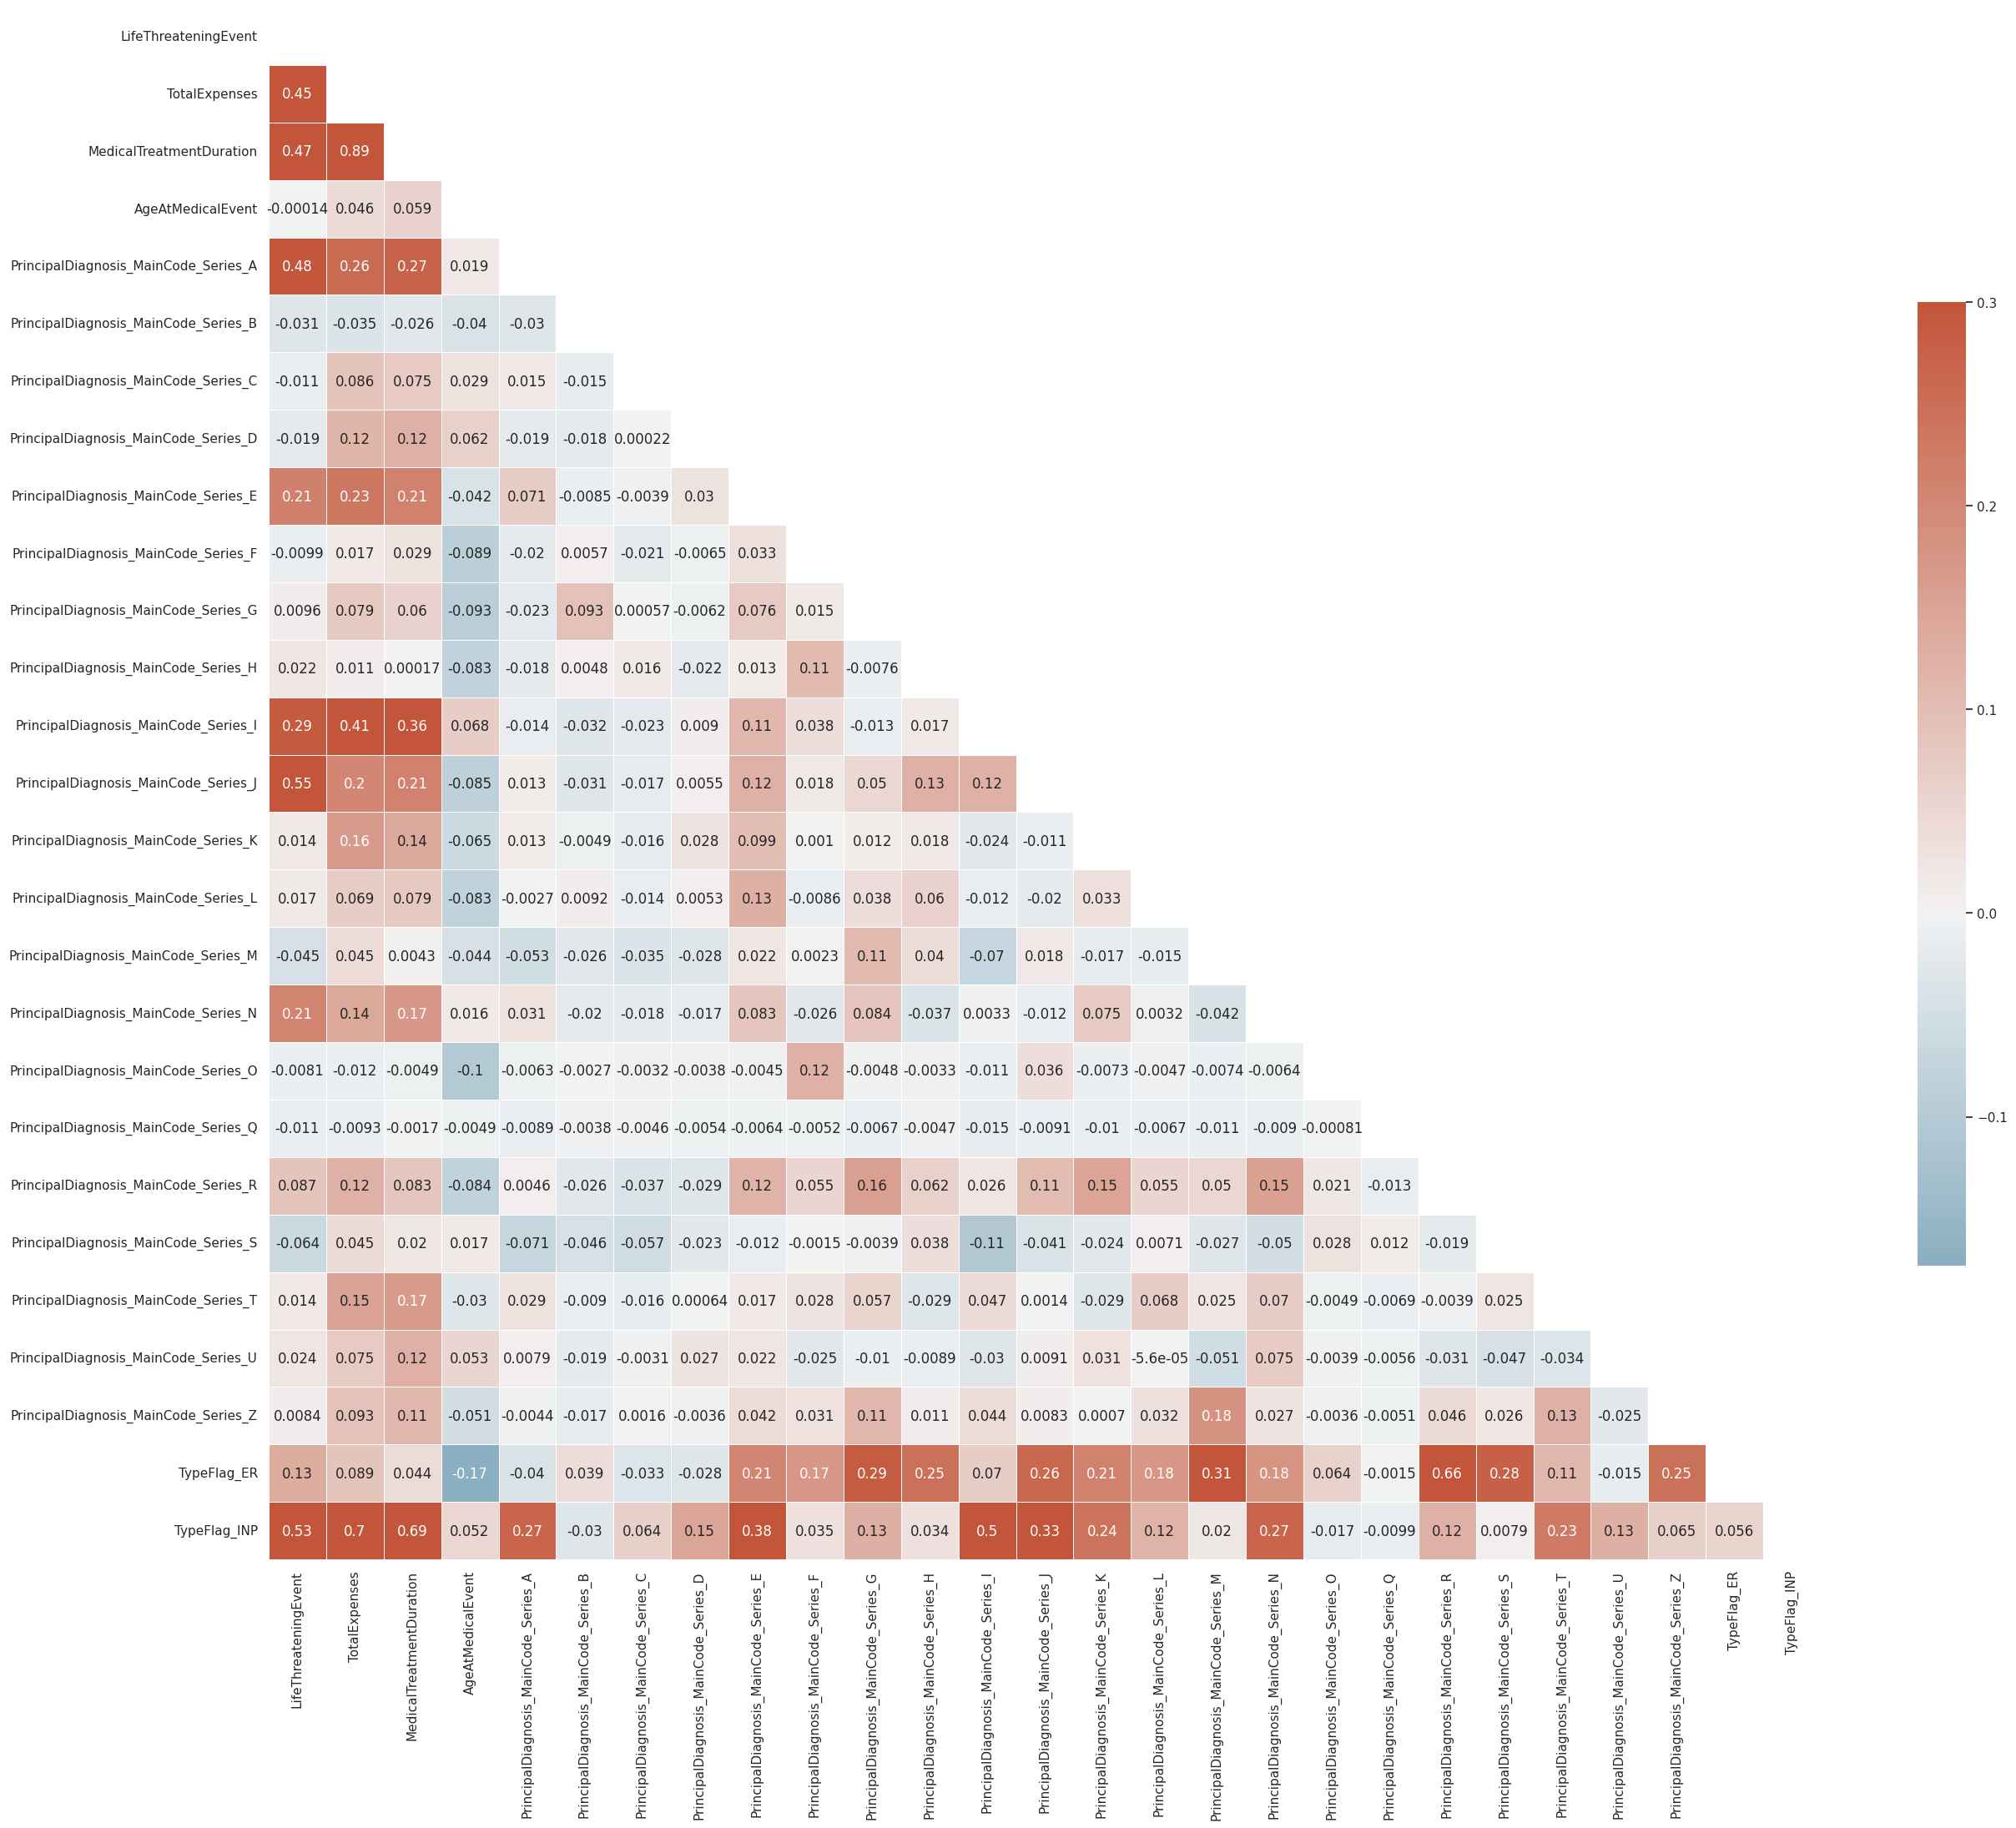

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")



# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
MedicalClaimsGroupedDummiesConsolidated.columns

Index(['LifeThreateningEvent', 'TotalExpenses', 'MedicalTreatmentDuration',
       'AgeAtMedicalEvent', 'PrincipalDiagnosis_MainCode_Series_A',
       'PrincipalDiagnosis_MainCode_Series_B',
       'PrincipalDiagnosis_MainCode_Series_C',
       'PrincipalDiagnosis_MainCode_Series_D',
       'PrincipalDiagnosis_MainCode_Series_E',
       'PrincipalDiagnosis_MainCode_Series_F',
       'PrincipalDiagnosis_MainCode_Series_G',
       'PrincipalDiagnosis_MainCode_Series_H',
       'PrincipalDiagnosis_MainCode_Series_I',
       'PrincipalDiagnosis_MainCode_Series_J',
       'PrincipalDiagnosis_MainCode_Series_K',
       'PrincipalDiagnosis_MainCode_Series_L',
       'PrincipalDiagnosis_MainCode_Series_M',
       'PrincipalDiagnosis_MainCode_Series_N',
       'PrincipalDiagnosis_MainCode_Series_O',
       'PrincipalDiagnosis_MainCode_Series_Q',
       'PrincipalDiagnosis_MainCode_Series_R',
       'PrincipalDiagnosis_MainCode_Series_S',
       'PrincipalDiagnosis_MainCode_Series_T',
       'Pr

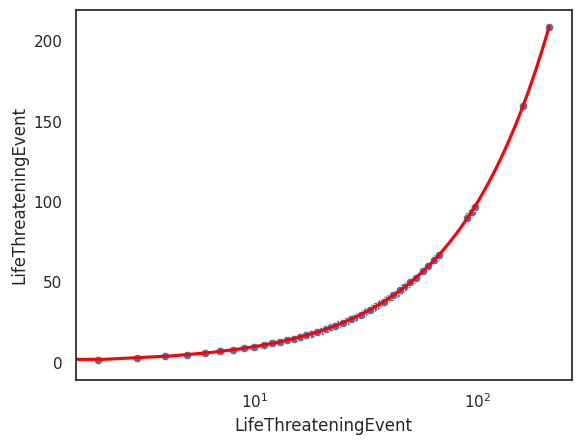

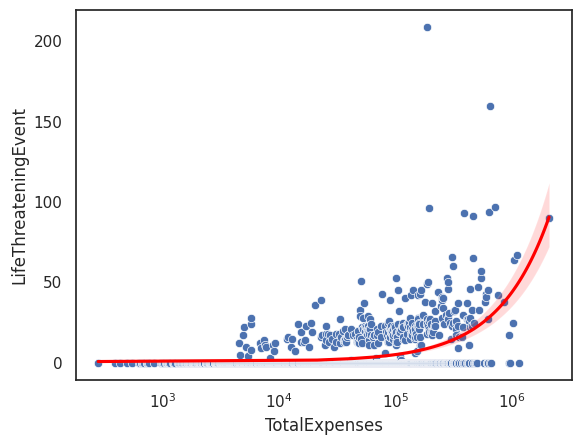

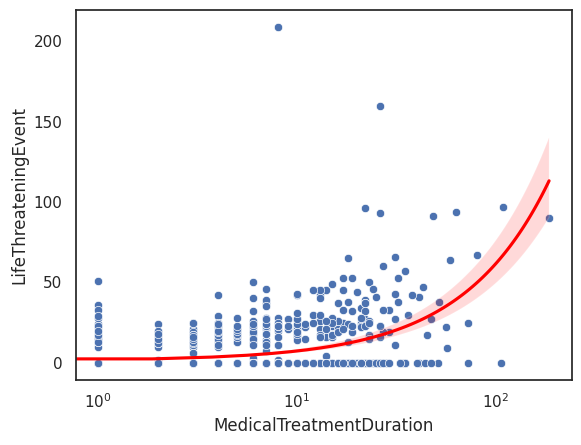

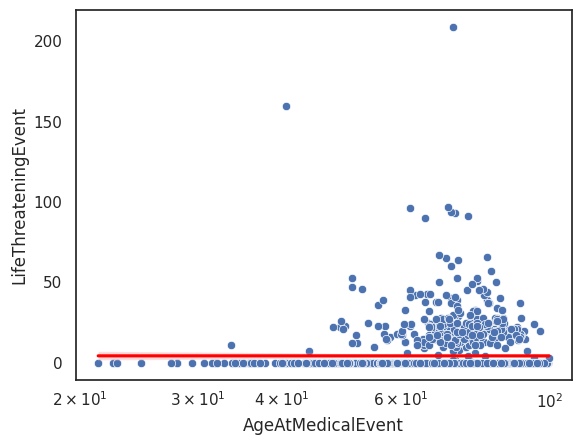

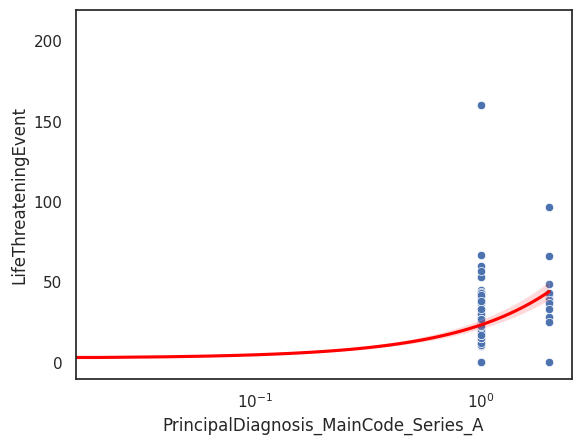

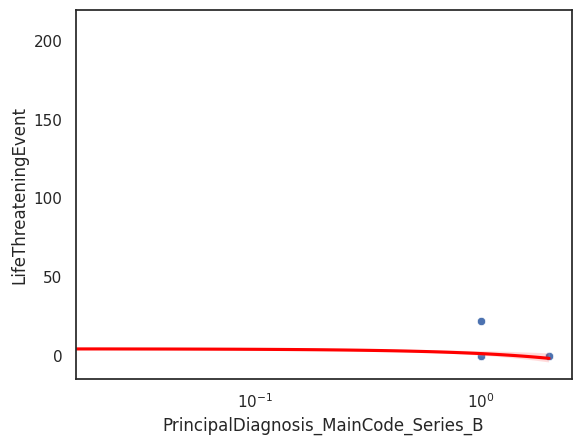

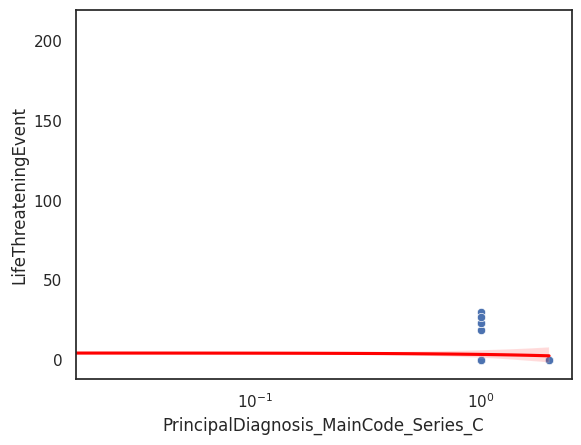

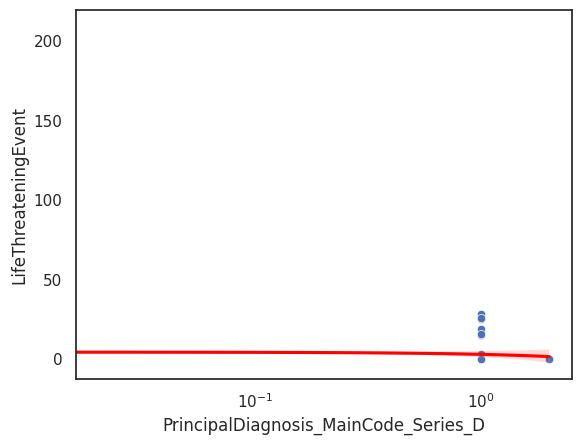

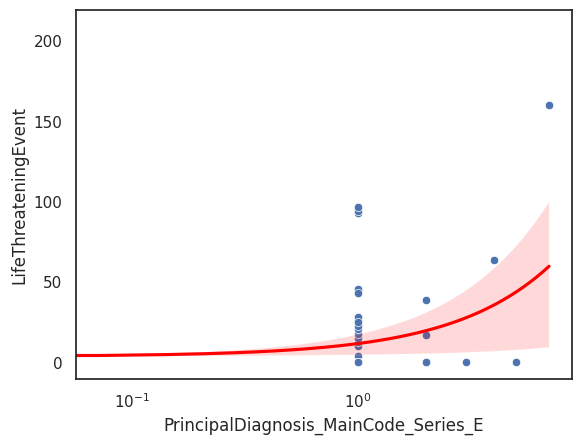

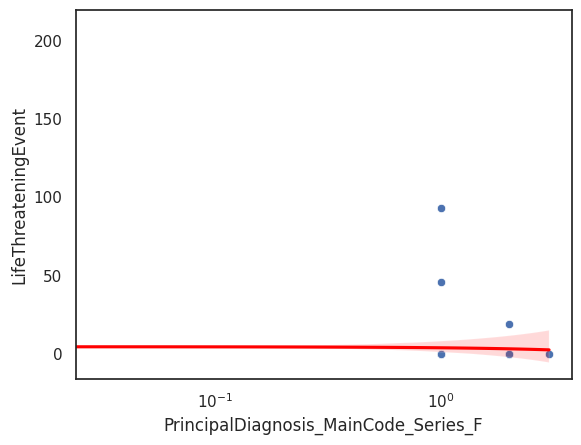

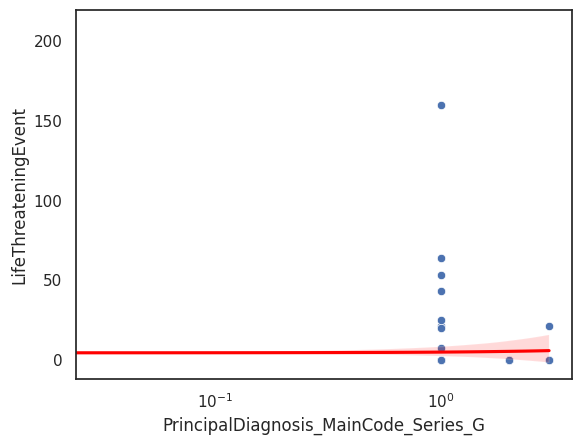

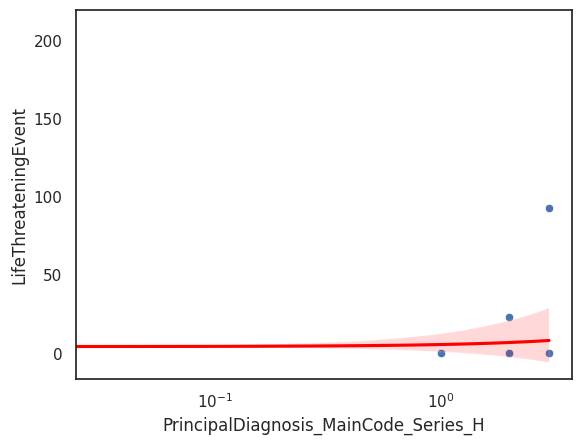

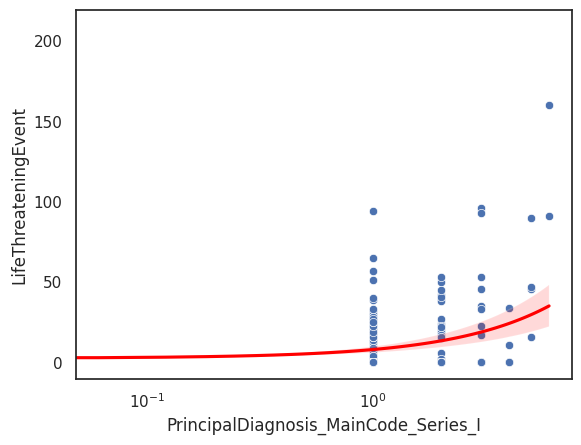

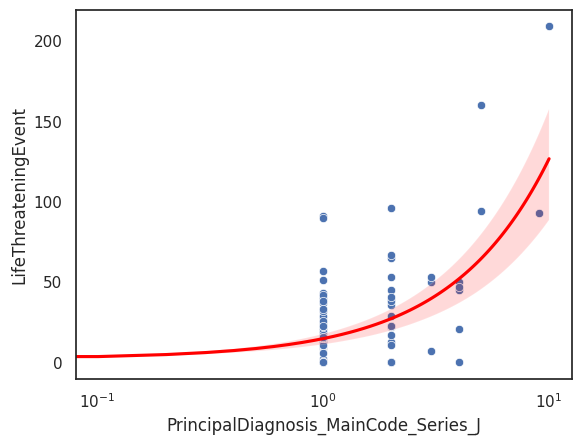

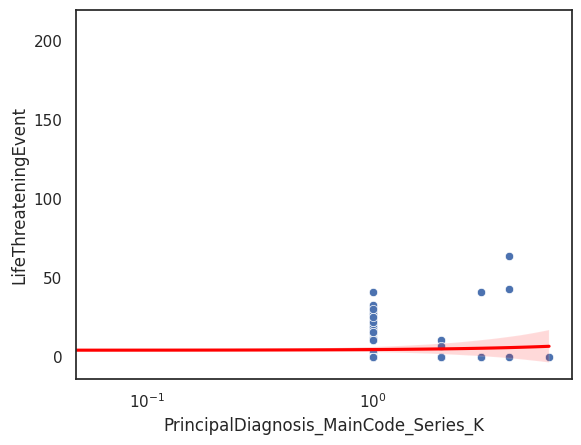

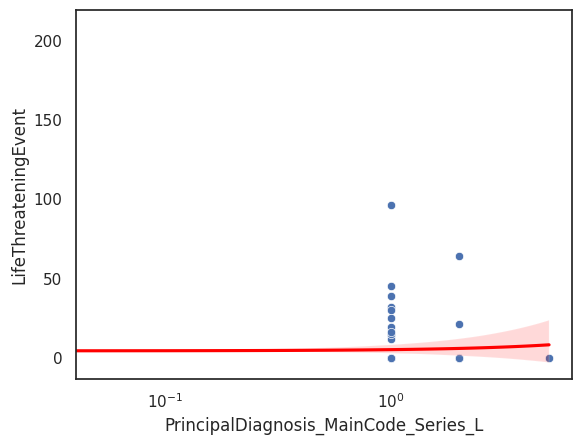

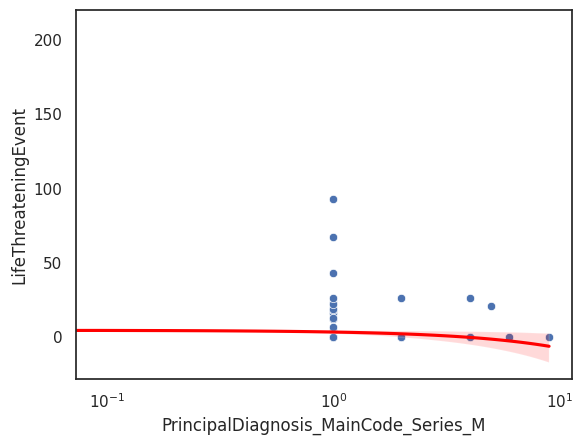

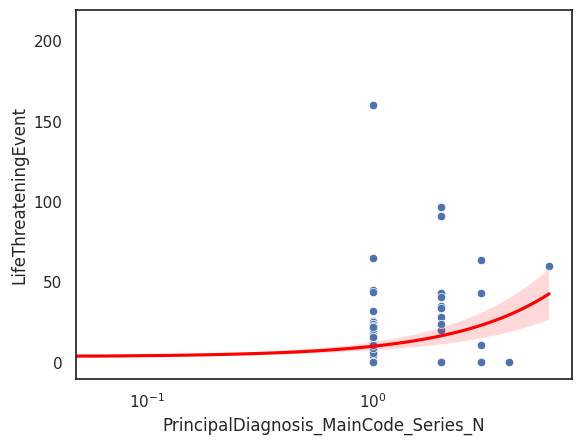

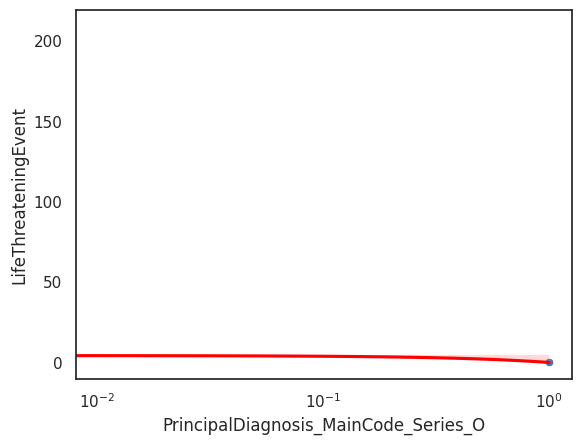

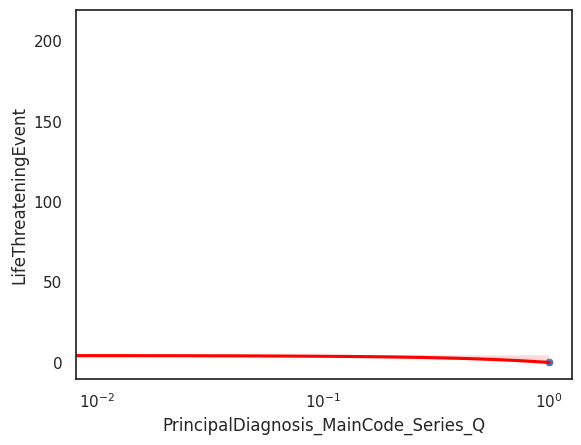

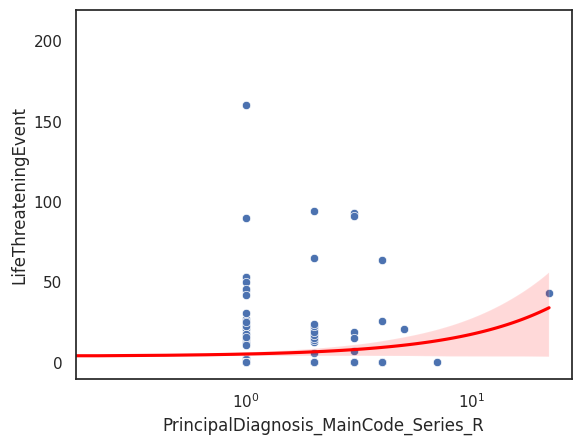

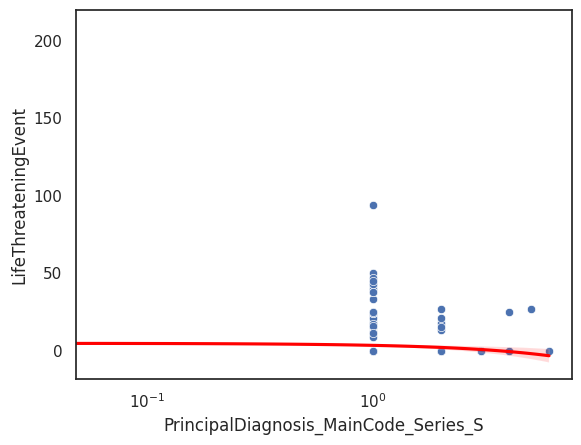

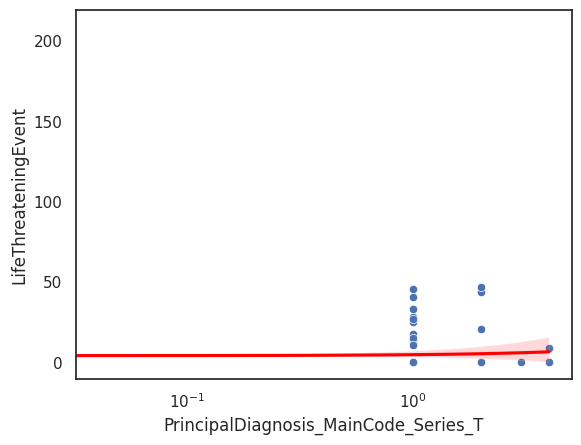

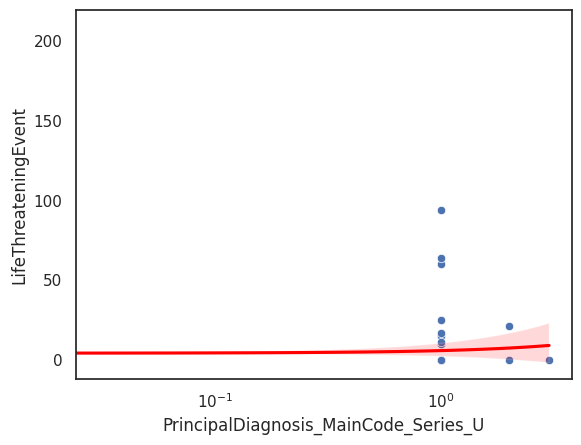

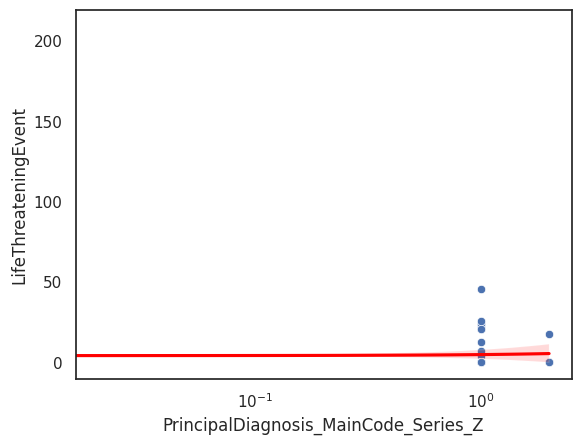

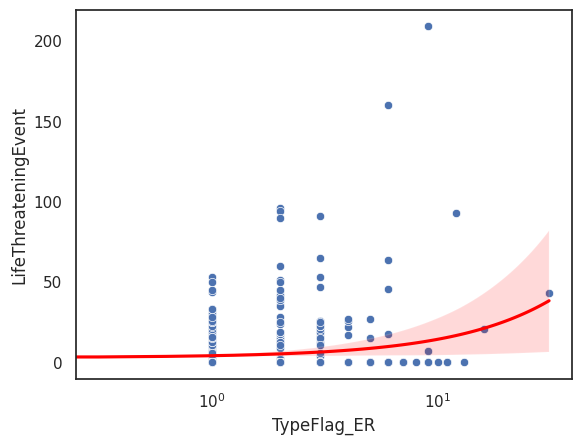

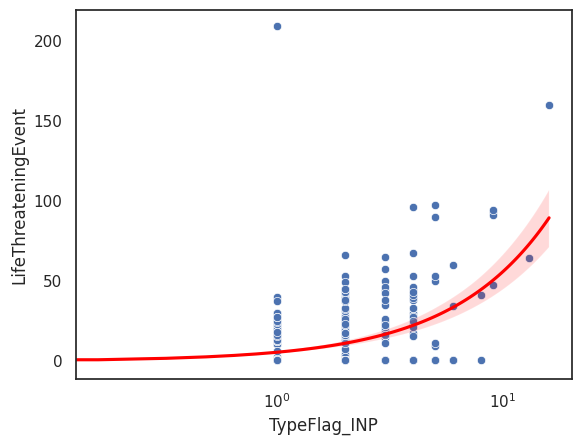

In [ ]:
for factor in MedicalClaimsGroupedDummiesConsolidated.columns:
  sns.scatterplot(x=factor, y='LifeThreateningEvent', data=MedicalClaimsGroupedDummiesConsolidated)
  plt.xscale('log')
  sns.regplot(x=factor, y='LifeThreateningEvent', data=MedicalClaimsGroupedDummiesConsolidated, scatter=False, color='red')
  plt.show()


##  5. Would you experience a life threatening event ?
### We want to explore the impact of past events on the response (having a life threatening event)
#### The response is an ordinal variable (low, medium,high), therefore we use a multiclass classifier

In [ ]:
MedicalClaimsGroupedDummiesConsolidated.head(3)

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,PrincipalDiagnosis_MainCode_Series_A,PrincipalDiagnosis_MainCode_Series_B,PrincipalDiagnosis_MainCode_Series_C,PrincipalDiagnosis_MainCode_Series_D,PrincipalDiagnosis_MainCode_Series_E,PrincipalDiagnosis_MainCode_Series_F,PrincipalDiagnosis_MainCode_Series_G,PrincipalDiagnosis_MainCode_Series_H,PrincipalDiagnosis_MainCode_Series_I,PrincipalDiagnosis_MainCode_Series_J,PrincipalDiagnosis_MainCode_Series_K,PrincipalDiagnosis_MainCode_Series_L,PrincipalDiagnosis_MainCode_Series_M,PrincipalDiagnosis_MainCode_Series_N,PrincipalDiagnosis_MainCode_Series_O,PrincipalDiagnosis_MainCode_Series_Q,PrincipalDiagnosis_MainCode_Series_R,PrincipalDiagnosis_MainCode_Series_S,PrincipalDiagnosis_MainCode_Series_T,PrincipalDiagnosis_MainCode_Series_U,PrincipalDiagnosis_MainCode_Series_Z,TypeFlag_ER,TypeFlag_INP
MemberID,,,,,,,,,,,,,,,,,,,,,,,,,,,
2f83e2ef,0,280.700,0,71.619439,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
26438e33,0,388.185,0,75.077344,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0
cd725d86,0,433.300,0,70.603696,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
MedicalClaimsGroupedDummiesConsolidated['LifeThreateningEvent'].describe()

,LifeThreateningEvent
count,1757.000000
mean,4.290837
std,12.645382
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,209.000000


In [ ]:
# prompt: I need to bin the column LifeThreateningEvent. first bin from zero to five, second bin from five to ten, third bin from ten to 300

# Assuming 'MedicalClaimsGroupedDummiesConsolidated' is your DataFrame.
bins = [0, 10, 300]  # Define the bin edges
labels = ['low',  'high']  # Define labels for the bins

# Create a new column 'LifeThreateningEventBinned' with the binned values
MedicalClaimsGroupedDummiesConsolidated['LifeThreateningEventDiscrete'] = pd.cut(
    MedicalClaimsGroupedDummiesConsolidated['LifeThreateningEvent'], bins=bins, labels=labels, include_lowest=True
)


In [ ]:
MedicalClaimsGroupedDummiesConsolidated[['LifeThreateningEvent','LifeThreateningEventDiscrete']]

,LifeThreateningEvent,LifeThreateningEventDiscrete
MemberID,,
2f83e2ef,0,low
26438e33,0,low
cd725d86,0,low
c45c8ba3,0,low
9e636133,0,low
...,...,...
54dabc09,25,high
e8b6b438,64,high
c1fb6713,67,high


In [ ]:
MedicalClaimsGroupedDummiesConsolidated.groupby('LifeThreateningEventDiscrete').count()

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,PrincipalDiagnosis_MainCode_Series_A,PrincipalDiagnosis_MainCode_Series_B,PrincipalDiagnosis_MainCode_Series_C,PrincipalDiagnosis_MainCode_Series_D,PrincipalDiagnosis_MainCode_Series_E,PrincipalDiagnosis_MainCode_Series_F,PrincipalDiagnosis_MainCode_Series_G,PrincipalDiagnosis_MainCode_Series_H,PrincipalDiagnosis_MainCode_Series_I,PrincipalDiagnosis_MainCode_Series_J,PrincipalDiagnosis_MainCode_Series_K,PrincipalDiagnosis_MainCode_Series_L,PrincipalDiagnosis_MainCode_Series_M,PrincipalDiagnosis_MainCode_Series_N,PrincipalDiagnosis_MainCode_Series_O,PrincipalDiagnosis_MainCode_Series_Q,PrincipalDiagnosis_MainCode_Series_R,PrincipalDiagnosis_MainCode_Series_S,PrincipalDiagnosis_MainCode_Series_T,PrincipalDiagnosis_MainCode_Series_U,PrincipalDiagnosis_MainCode_Series_Z,TypeFlag_ER,TypeFlag_INP
LifeThreateningEventDiscrete,,,,,,,,,,,,,,,,,,,,,,,,,,,
low,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482
high,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275


In [ ]:
y=MedicalClaimsGroupedDummiesConsolidated['LifeThreateningEventDiscrete']
y

,LifeThreateningEventDiscrete
MemberID,
2f83e2ef,low
26438e33,low
cd725d86,low
c45c8ba3,low
9e636133,low
...,...
54dabc09,high
e8b6b438,high
c1fb6713,high


In [ ]:
X=MedicalClaimsGroupedDummiesConsolidated.drop(['LifeThreateningEvent','LifeThreateningEventDiscrete'],axis=1)
X

,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,PrincipalDiagnosis_MainCode_Series_A,PrincipalDiagnosis_MainCode_Series_B,PrincipalDiagnosis_MainCode_Series_C,PrincipalDiagnosis_MainCode_Series_D,PrincipalDiagnosis_MainCode_Series_E,PrincipalDiagnosis_MainCode_Series_F,PrincipalDiagnosis_MainCode_Series_G,PrincipalDiagnosis_MainCode_Series_H,PrincipalDiagnosis_MainCode_Series_I,PrincipalDiagnosis_MainCode_Series_J,PrincipalDiagnosis_MainCode_Series_K,PrincipalDiagnosis_MainCode_Series_L,PrincipalDiagnosis_MainCode_Series_M,PrincipalDiagnosis_MainCode_Series_N,PrincipalDiagnosis_MainCode_Series_O,PrincipalDiagnosis_MainCode_Series_Q,PrincipalDiagnosis_MainCode_Series_R,PrincipalDiagnosis_MainCode_Series_S,PrincipalDiagnosis_MainCode_Series_T,PrincipalDiagnosis_MainCode_Series_U,PrincipalDiagnosis_MainCode_Series_Z,TypeFlag_ER,TypeFlag_INP
MemberID,,,,,,,,,,,,,,,,,,,,,,,,,,
2f83e2ef,280.700,0,71.619439,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
26438e33,388.185,0,75.077344,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0
cd725d86,433.300,0,70.603696,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
c45c8ba3,492.100,0,66.193018,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9e636133,550.200,0,74.217659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54dabc09,1026046.063,72,80.851472,2,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,2,4
e8b6b438,1033237.527,59,73.002053,0,0,0,0,4,0,1,0,0,0,4,2,0,3,0,0,4,0,0,1,0,6,13
c1fb6713,1107621.039,80,68.462697,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,4


## 6. Let's split the data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y)

In [ ]:
X_train

,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,PrincipalDiagnosis_MainCode_Series_A,PrincipalDiagnosis_MainCode_Series_B,PrincipalDiagnosis_MainCode_Series_C,PrincipalDiagnosis_MainCode_Series_D,PrincipalDiagnosis_MainCode_Series_E,PrincipalDiagnosis_MainCode_Series_F,PrincipalDiagnosis_MainCode_Series_G,PrincipalDiagnosis_MainCode_Series_H,PrincipalDiagnosis_MainCode_Series_I,PrincipalDiagnosis_MainCode_Series_J,PrincipalDiagnosis_MainCode_Series_K,PrincipalDiagnosis_MainCode_Series_L,PrincipalDiagnosis_MainCode_Series_M,PrincipalDiagnosis_MainCode_Series_N,PrincipalDiagnosis_MainCode_Series_O,PrincipalDiagnosis_MainCode_Series_Q,PrincipalDiagnosis_MainCode_Series_R,PrincipalDiagnosis_MainCode_Series_S,PrincipalDiagnosis_MainCode_Series_T,PrincipalDiagnosis_MainCode_Series_U,PrincipalDiagnosis_MainCode_Series_Z,TypeFlag_ER,TypeFlag_INP
MemberID,,,,,,,,,,,,,,,,,,,,,,,,,,
704e386e,61343.660,2,87.101985,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
b9841560,13572.020,1,80.585900,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7bed09c4,20858.292,1,78.759754,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
79756a6e,17360.056,0,75.310062,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
dc1d0fd5,3537.625,0,70.138261,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e636133,550.200,0,74.217659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
558f84ad,6330.016,0,56.271047,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0
0f9547e9,113777.188,10,50.228611,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,3


In [ ]:
y_train

,LifeThreateningEventDiscrete
MemberID,
704e386e,low
b9841560,low
7bed09c4,low
79756a6e,low
dc1d0fd5,low
...,...
9e636133,low
558f84ad,low
0f9547e9,low


In [ ]:
X_test

,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,PrincipalDiagnosis_MainCode_Series_A,PrincipalDiagnosis_MainCode_Series_B,PrincipalDiagnosis_MainCode_Series_C,PrincipalDiagnosis_MainCode_Series_D,PrincipalDiagnosis_MainCode_Series_E,PrincipalDiagnosis_MainCode_Series_F,PrincipalDiagnosis_MainCode_Series_G,PrincipalDiagnosis_MainCode_Series_H,PrincipalDiagnosis_MainCode_Series_I,PrincipalDiagnosis_MainCode_Series_J,PrincipalDiagnosis_MainCode_Series_K,PrincipalDiagnosis_MainCode_Series_L,PrincipalDiagnosis_MainCode_Series_M,PrincipalDiagnosis_MainCode_Series_N,PrincipalDiagnosis_MainCode_Series_O,PrincipalDiagnosis_MainCode_Series_Q,PrincipalDiagnosis_MainCode_Series_R,PrincipalDiagnosis_MainCode_Series_S,PrincipalDiagnosis_MainCode_Series_T,PrincipalDiagnosis_MainCode_Series_U,PrincipalDiagnosis_MainCode_Series_Z,TypeFlag_ER,TypeFlag_INP
MemberID,,,,,,,,,,,,,,,,,,,,,,,,,,
dd260f19,22913.688,0,83.718001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3fd40069,12728.177,4,61.831622,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6c60cb9f,10150.574,1,64.752909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
bb36d9c4,1264.704,0,62.992471,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
d341e401,69543.943,12,58.225873,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdf422c9,98274.001,1,74.806297,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
20a6851f,417552.247,22,85.292266,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
016eec96,9130.723,0,92.536619,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
y_test

,LifeThreateningEventDiscrete
MemberID,
dd260f19,low
3fd40069,low
6c60cb9f,low
bb36d9c4,low
d341e401,low
...,...
fdf422c9,low
20a6851f,high
016eec96,low


In [ ]:
# prompt: count different values in train_y

from collections import Counter

# Assuming 'train_y' is your target variable from the train_test_split
y_train_counts = Counter(y_train)
y_train_counts

Counter({'low': 1111, 'high': 206})

In [ ]:
y_test_counts = Counter(y_test)
y_test_counts

Counter({'low': 371, 'high': 69})

## 7. First model (DecisionTree model)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

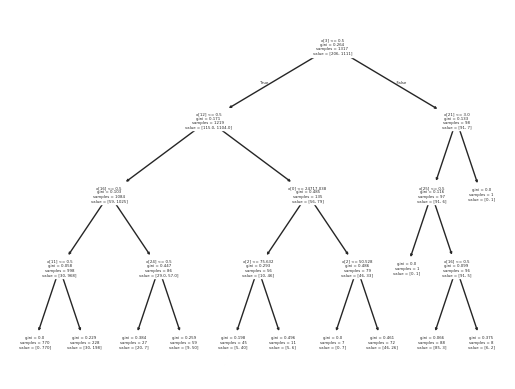

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf);

### Model Evaluation

In [ ]:
# Make predictions on the test set
y_test_predicted = tree_clf.predict(X_test)

In [ ]:
y_test_predicted

array(['low', 'high', 'low', 'low', 'low', 'high', 'low', 'low', 'low',
       'low', 'low', 'low', 'high', 'low', 'low', 'high', 'high', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'high', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'high', 'high', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'high', 'low', 'high', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low', 'low',
   

In [ ]:
y_test.values

['low', 'low', 'low', 'low', 'low', ..., 'low', 'high', 'low', 'low', 'low']
Length: 440
Categories (2, object): ['low' < 'high']

In [ ]:
from sklearn import metrics
print(
    f"Classification report for classifier {tree_clf}:\n"
    f"{metrics.classification_report(y_test, y_test_predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier(max_depth=4, random_state=42):
              precision    recall  f1-score   support

        high       0.69      0.65      0.67        69
         low       0.94      0.95      0.94       371

    accuracy                           0.90       440
   macro avg       0.81      0.80      0.81       440
weighted avg       0.90      0.90      0.90       440




Confusion matrix:
[[ 45  24]
 [ 20 351]]


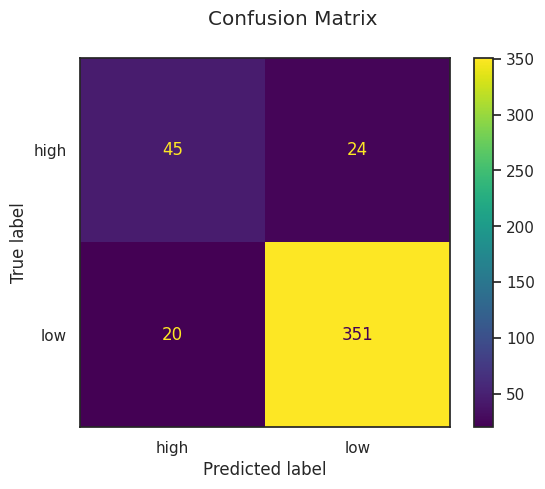

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
y_test.values

['low', 'low', 'low', 'low', 'low', ..., 'low', 'high', 'low', 'low', 'low']
Length: 440
Categories (2, object): ['low' < 'high']

In [ ]:
# prompt: convert values in y_test to 0/1

np.where(y_test == 'high', 1, 0)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,

In [ ]:
np.where(y_test_predicted == 'high', 1, 0)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_test_binary=np.where(y_test == 'high', 1, 0)
y_test_predicted_binary=np.where(y_test_predicted == 'high', 1, 0)

fpr_forest, tpr_forest, thresholds_forest= roc_curve(y_test_binary, y_test_predicted_binary )





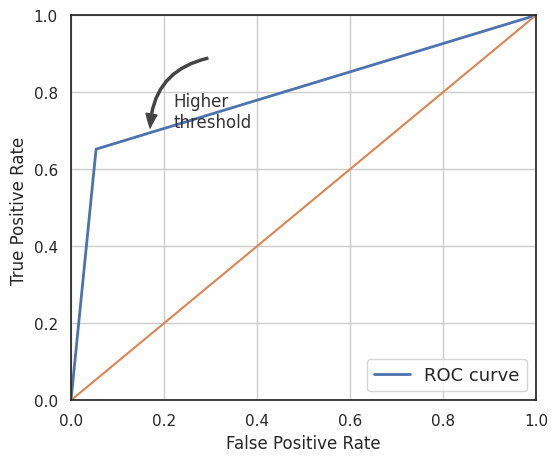

In [ ]:
import matplotlib.patches as patches # import the patches module
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="ROC curve")



plt.gca().add_patch(patches.FancyArrowPatch(
    (0.30, 0.89), (0.17, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.22, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.plot([0, 1], [0, 1],label="Random Classifier")


plt.show()

## Second model (Random Forests model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=20)
rnd_clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20)

In [ ]:
# Make predictions on the test set
y_test_predicted = rnd_clf.predict(X_test)

Confusion matrix:
[[ 43  26]
 [ 21 350]]


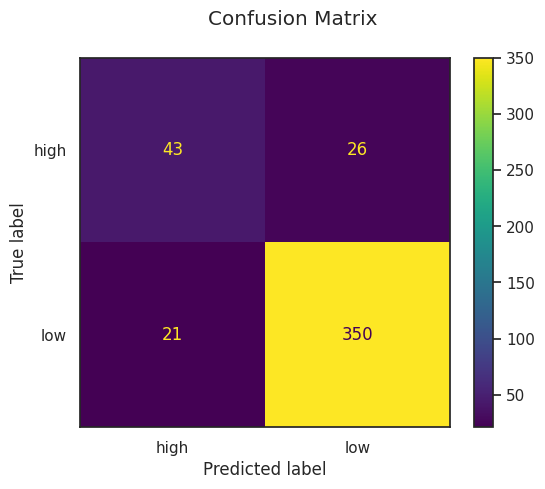

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
# prompt: convert values in y_test to 0/1

np.where(y_test == 'high', 1, 0)
np.where(y_test_predicted == 'high', 1, 0)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_test_binary=np.where(y_test == 'high', 1, 0)
y_test_predicted_binary=np.where(y_test_predicted == 'high', 1, 0)

fpr_forest, tpr_forest, thresholds_forest= roc_curve(y_test_binary, y_test_predicted_binary )




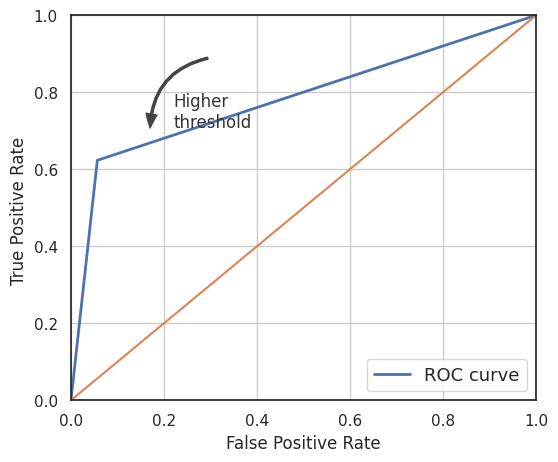

In [ ]:
import matplotlib.patches as patches # import the patches module
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="ROC curve")



plt.gca().add_patch(patches.FancyArrowPatch(
    (0.30, 0.89), (0.17, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.22, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.plot([0, 1], [0, 1],label="Random Classifier")


plt.show()

## 9. Third model (GradientBoost model)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
    max_depth=1)
gboost_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=50)

In [ ]:
# Make predictions on the test set
y_test_predicted = gboost_clf.predict(X_test)

Confusion matrix:
[[ 35  34]
 [ 10 361]]


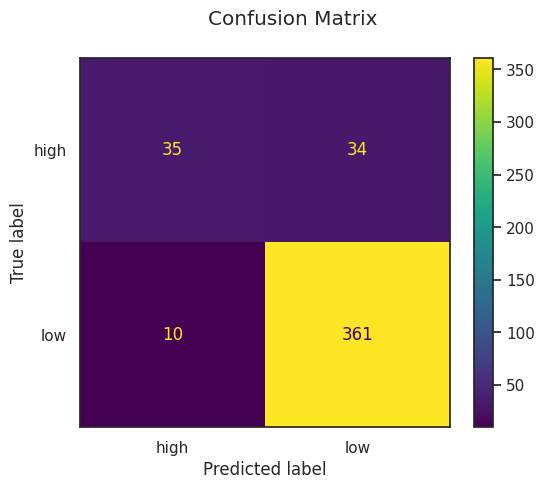

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
# prompt: convert values in y_test to 0/1

np.where(y_test == 'high', 1, 0)
np.where(y_test_predicted == 'high', 1, 0)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test_binary=np.where(y_test == 'high', 1, 0)
y_test_predicted_binary=np.where(y_test_predicted == 'high', 1, 0)

fpr_forest, tpr_forest, thresholds_forest= roc_curve(y_test_binary, y_test_predicted_binary )




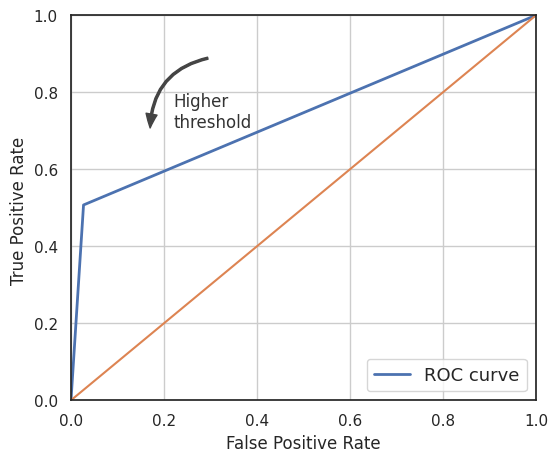

In [ ]:
import matplotlib.patches as patches # import the patches module
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="ROC curve")



plt.gca().add_patch(patches.FancyArrowPatch(
    (0.30, 0.89), (0.17, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.22, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.plot([0, 1], [0, 1],label="Random Classifier")


plt.show()

## 9. Fourth model (AdaBoost model)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(n_estimators=10)
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10)

In [ ]:
# Make predictions on the test set
y_test_predicted = adaboost_clf.predict(X_test)

Confusion matrix:
[[ 32  37]
 [  7 364]]


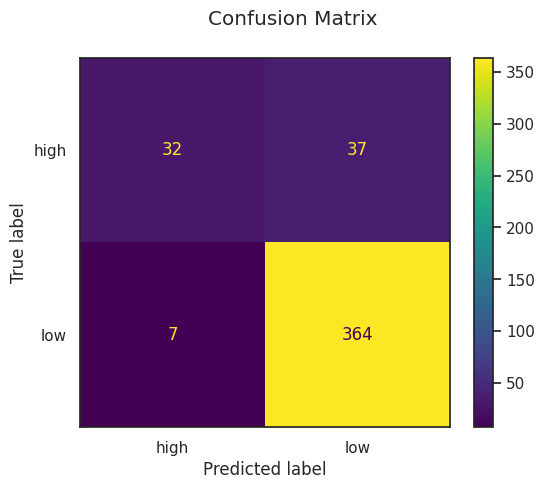

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()